* Bootstrap data >> 1 Decision Tree
* max_features >> to select max features >> sqrt(total no of features)
* Out of Bag >> OOB >> OOB Score 
* All bootstrap data will be unique
* OOB Score >> no of correctly classified OOB samples / total no of OOB samples
* OOB error >> total no of incorrectly classified OOB samples / total no of OOB samples
* Voting Classifier 
1. Hard Voting 
2. Soft Voting

1. Hard Voting >>   
                    0    1    
* Model1 Output >> [90  10] majority > 0 class
* Model2 Output >> [80  20] majority > 0 class
* Model3 Output >> [10  90] majority > 1 class

in above example 0 class is in majority , so output will be 0 class

2. Soft Voting >>
                    0    1    
* Model1 Output >> [90  10] 
* Model2 Output >> [80  20] 
* Model3 Output >> [10  90]

* in this example we will take mean of 0 class >> 90+80+10/3 >> 60 class 0
* in this example we will take mean of 1 class >> 10+20+90/3 >> 40 class 1
* as the mean of the class 0 is higher so class 0 will be selected as output

> hyperparameter >> 
1. n_estimators >> no of decision trees
2. criterion >> gini,entropy,MSE,MAE
3. min_sample_split >> 2
4. min_sample_leaf >> 1
5. max_depth >> none 
6. max_features >> auto (sqrt[no of features])
7. OOB score >> False
8. Bootstrap >> True


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from imblearn.over_sampling import SMOTE,RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

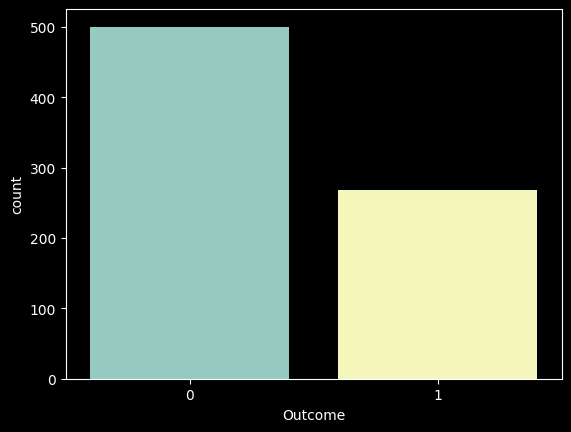

In [4]:
sns.countplot(x=df["Outcome"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.117188,69.076823,20.536458,79.799479,31.992578,0.471876,33.243490,0.348958
std,31.805091,19.367794,15.952218,115.244002,7.884160,0.331329,11.758182,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,142.000000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Sampling

In [7]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [8]:
smt = SMOTE()
x,y = smt.fit_resample(x,y)

In [9]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12,stratify=y)


In [11]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
139,105,72,29,325,36.900000,0.15900,28
619,119,0,0,0,32.400000,0.14100,24
643,90,0,0,0,28.000000,0.61000,31
218,85,74,22,0,29.000000,1.22400,32
846,192,83,0,0,28.229935,0.18773,61
...,...,...,...,...,...,...,...
871,134,91,32,134,30.153651,0.24929,43
159,163,72,41,114,40.900000,0.81700,47
286,155,84,44,545,38.700000,0.61900,34
351,137,84,0,0,31.200000,0.25200,30


In [12]:
y_test

141    0
932    1
116    1
245    1
879    1
      ..
251    0
795    1
162    0
508    0
422    0
Name: Outcome, Length: 200, dtype: int64

Model Building

1.Decision Tree

In [13]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

Training data Evaluation

In [14]:
y_pred_train = dt_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Testing data evaluation

In [15]:
y_pred_test=dt_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[72 28]
 [30 70]]
********************************************************************************
Accuracy score:  0.71
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.71      0.72      0.71       100
           1       0.71      0.70      0.71       100

    accuracy                           0.71       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.71      0.71      0.71       200



2. Random Forest

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

Training data Evaluation

In [17]:
y_pred_train = rf_model.predict(x_train)
cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_train,y_pred_train)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_train,y_pred_train)
print("Clf report:\n",clf_report)

Confusion matrix:
 [[400   0]
 [  0 400]]
********************************************************************************
Accuracy score:  1.0
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Testing Data Evaluation

In [18]:
y_pred_test=rf_model.predict(x_test)
cnf_matrix=confusion_matrix(y_test,y_pred_test)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy score: ",accuracy)
print("*"*80)
clf_report=classification_report(y_test,y_pred_test)
print("Clf report:\n",clf_report)

Confusion Matrix:
 [[84 16]
 [12 88]]
********************************************************************************
Accuracy score:  0.86
********************************************************************************
Clf report:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.85      0.88      0.86       100

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



Hyperparameter tuning

In [19]:
rf_model = RandomForestClassifier()
n_estimators=100, # No. decison Tree
criterion='gini', # gini entrpoy
max_depth=None,  # Depth of DT
min_samples_split=2,
min_samples_leaf=1,
max_features='sqrt'
bootstrap=True,
oob_score=False,
n_jobs=None,

hyperparameters = {"n_estimators":np.arange(10,200),
                   "criterion":["gini","entropy"],
                   "max_depth":np.arange(3,8),
                   "min_samples_split":np.arange(4,20),
                   "min_samples_leaf":np.arange(3,10),
                   "max_features":[7]}
rscv_rf_model = RandomizedSearchCV(rf_model,hyperparameters,cv=5)
rscv_rf_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'max_features': [7],
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,...
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199])})

In [20]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=6, max_features=7, min_samples_leaf=6,
                       min_samples_split=16, n_estimators=78)